In [38]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading data

In [39]:
df = pd.read_csv('us_national.csv')
df

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2013-09-01,2013-09-30,30,national,11,1400,f,National,National,U.S.,...,0.019563,0.062720,0.006790,0.006161,0.262773,-0.017504,-0.042618,NaN,NaN,2023-01-15 14:42:04
1,2014-07-01,2014-07-31,30,national,11,1400,f,National,National,U.S.,...,-0.026645,0.077073,0.003756,0.020332,0.290919,-0.010735,-0.000143,NaN,NaN,2023-01-15 14:42:04
2,2017-09-01,2017-09-30,30,national,11,1400,f,National,National,U.S.,...,0.016016,0.097603,-0.000295,-0.001058,0.402473,0.005173,0.041389,NaN,NaN,2023-01-15 14:42:04
3,2020-05-01,2020-05-31,30,national,11,1400,f,National,National,U.S.,...,-0.004210,0.084985,0.007821,-0.017420,0.399424,0.083085,-0.043231,NaN,NaN,2023-01-15 14:42:04
4,2018-06-01,2018-06-30,30,national,11,1400,f,National,National,U.S.,...,0.012185,0.149537,0.010169,0.019675,0.415500,-0.042659,0.018937,NaN,NaN,2023-01-15 14:42:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2021-02-01,2021-02-28,30,national,11,1400,t,National,National,U.S.,...,0.163490,0.090224,-0.005336,-0.041902,0.483637,-0.009935,0.082770,NaN,NaN,2023-01-15 00:00:00
1448,2013-08-01,2013-08-31,30,national,11,1400,t,National,National,U.S.,...,0.040843,0.060890,0.002609,0.002175,0.365011,-0.009772,0.007355,NaN,NaN,2023-01-15 00:00:00
1449,2018-02-01,2018-02-28,30,national,11,1400,t,National,National,U.S.,...,0.022025,0.126219,0.004020,0.005939,0.404988,0.001157,0.016444,NaN,NaN,2023-01-15 00:00:00
1450,2012-04-01,2012-04-30,30,national,11,1400,t,National,National,U.S.,...,NaN,0.059487,-0.001724,NaN,0.273479,0.001005,NaN,NaN,NaN,2023-01-15 00:00:00


Doing some initial analysis and getting general info on the data.

In [40]:
# Get the shape of the dataframe
print("Shape of the Dataframe: ", df.shape)

# Get the first 5 rows of the dataframe
print("First 5 rows:")
print(df.head())

# Get the descriptive statistics for all columns
print("Descriptive Statistics:")
print(df.describe())

# Get the number of missing values for each column
print("Missing Values:")
print(df.isnull().sum())

Shape of the Dataframe:  (1452, 58)
First 5 rows:
   period_begin  period_end  period_duration region_type  region_type_id  \
0    2013-09-01  2013-09-30               30    national              11   
1    2014-07-01  2014-07-31               30    national              11   
2    2017-09-01  2017-09-30               30    national              11   
3    2020-05-01  2020-05-31               30    national              11   
4    2018-06-01  2018-06-30               30    national              11   

   table_id is_seasonally_adjusted     region      city state  ...  \
0      1400                      f   National  National  U.S.  ...   
1      1400                      f   National  National  U.S.  ...   
2      1400                      f   National  National  U.S.  ...   
3      1400                      f   National  National  U.S.  ...   
4      1400                      f   National  National  U.S.  ...   

  sold_above_list_yoy price_drops  price_drops_mom  price_drops_yoy  \
0

# Preprocessing
Here we drop irrelevant parameters, ones that are just ids or that all have the same value. Here i deal with rarer missing values by filling them in with the median for that column unless the entire column is just NaN in which case i remove it. I also encode string values so they can be graphed and easier to use later on for classification.

In [41]:
le = LabelEncoder()
df = df.drop(columns=[col for col in df.columns if "id" in col], axis=1)
df = df.loc[:, (df != df.iloc[0]).any()]
df = df.dropna(axis=1, how='all')
df.fillna(df.median(), inplace=True)
df = df.drop(labels = ['last_updated'], axis=1) #removing irrelevant parameters, ones that are ids, all have the same value or nan
df = df.iloc[:, 2:] #dropping the periods to make the data simpler to use, an alternative would be to use just the year since it is a relevant parameter, i just expect the other parameters to be enough in this specific analysis
df.iloc[:,:2] = df.iloc[:,:2].apply(le.fit_transform)
X= df.drop(columns = ['median_sale_price'])
y = df["median_sale_price"]

column_names = df.columns
print(X.shape)
print(y.shape)
df

(1452, 43)
(1452,)


,is_seasonally_adjusted,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,...,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
0,0,2,193722.000000,-0.055535,0.134879,216953.000000,0.075488,0.200279,90.000000,-0.070349,...,0.004746,0.246456,-0.010187,0.019563,0.062720,0.006790,0.006161,0.262773,-0.017504,-0.042618
1,0,2,227490.000000,0.032640,0.122984,219646.000000,-0.071248,0.040377,107.000000,0.063850,...,-0.002898,0.240604,-0.001292,-0.026645,0.077073,0.003756,0.020332,0.290919,-0.010735,-0.000143
2,0,5,242999.000000,0.006764,0.050383,257980.000000,0.045297,0.065170,152.000000,0.008776,...,0.002909,0.252099,-0.015016,0.016016,0.097603,-0.000295,-0.001058,0.402473,0.005173,0.041389
3,0,2,304096.000000,-0.038348,-0.048520,394442.000000,0.062064,0.151251,136.000000,-0.037126,...,-0.003145,0.254716,-0.022901,-0.004210,0.084985,0.007821,-0.017420,0.399424,0.083085,-0.043231
4,0,4,292611.000000,0.019186,0.053400,299829.000000,-0.024614,0.062953,156.000000,0.012703,...,0.001875,0.296685,0.001505,0.012185,0.149537,0.010169,0.019675,0.415500,-0.042659,0.018937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1,0,348799.418221,0.009123,0.148072,355169.966890,0.013574,0.121323,189.045242,0.002785,...,0.016929,0.408084,0.003527,0.163490,0.090224,-0.005336,-0.041902,0.483637,-0.009935,0.082770
1448,1,5,195733.631308,-0.001493,0.129480,197861.972209,0.026782,0.142736,125.529448,0.010237,...,0.011101,0.241259,-0.007604,0.040843,0.060890,0.002609,0.002175,0.365011,-0.009772,0.007355
1449,1,4,278361.746342,0.011058,0.074147,291358.869134,0.002413,0.078590,150.347107,0.007213,...,0.003417,0.254003,0.003122,0.022025,0.126219,0.004020,0.005939,0.404988,0.001157,0.016444
1450,1,0,177432.705874,0.012467,0.070698,187931.548451,-0.008908,0.070539,97.221372,0.008180,...,0.003214,0.179483,-0.005890,0.017451,0.059487,-0.001724,0.002987,0.273479,0.001005,0.021020


# Analysis
Displaying the data in a histogram and as a heatmap of correlation to be able to visualise and understand the parameters more intuitively. As one would expect most of the parameters have a gaussian distribution.

<Figure size 1000x1000 with 0 Axes>

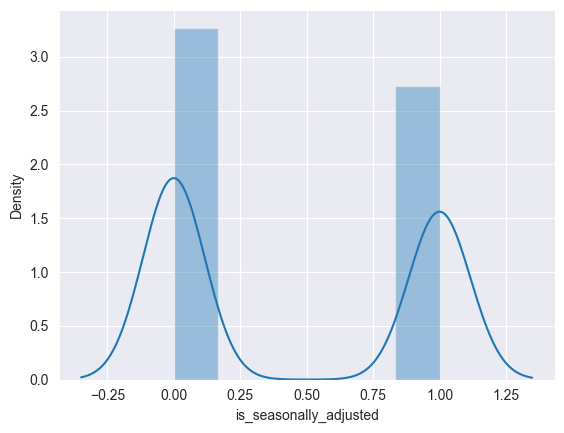

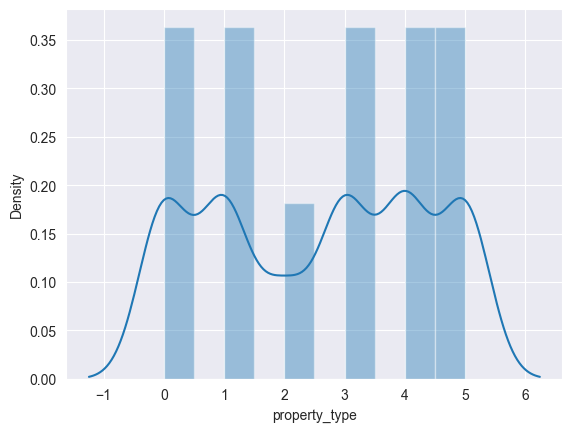

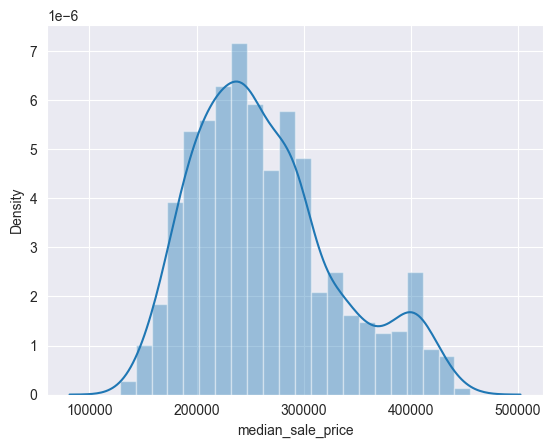

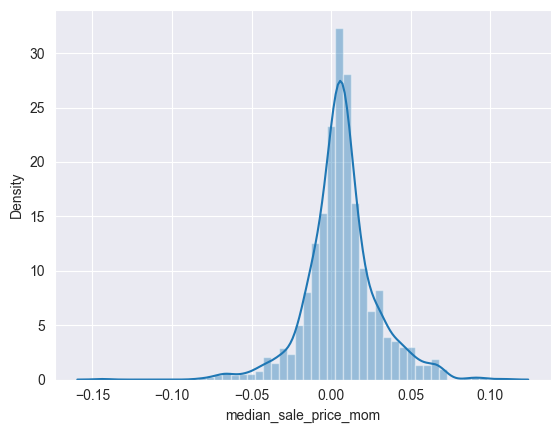

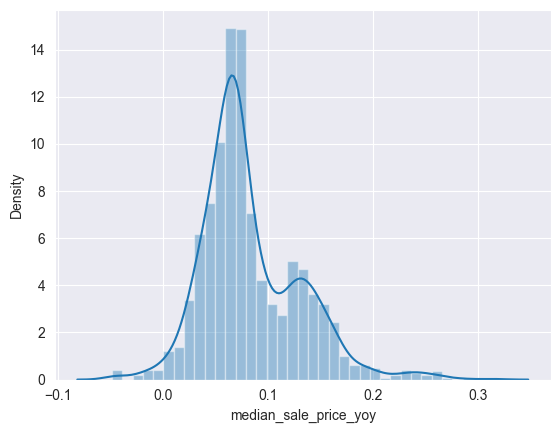

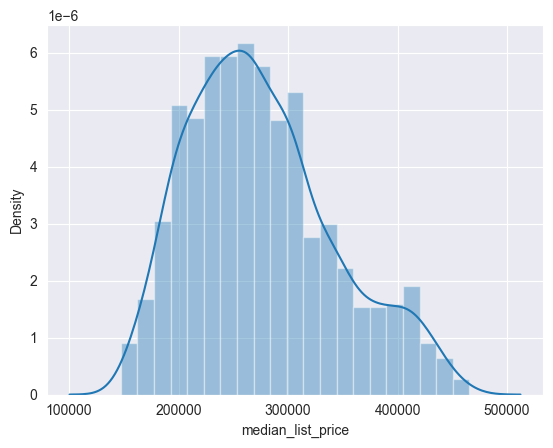

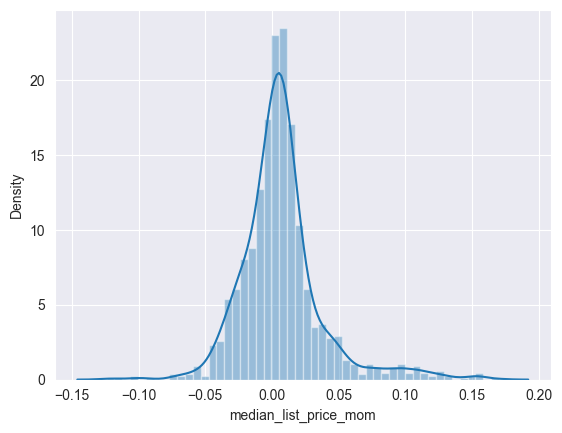

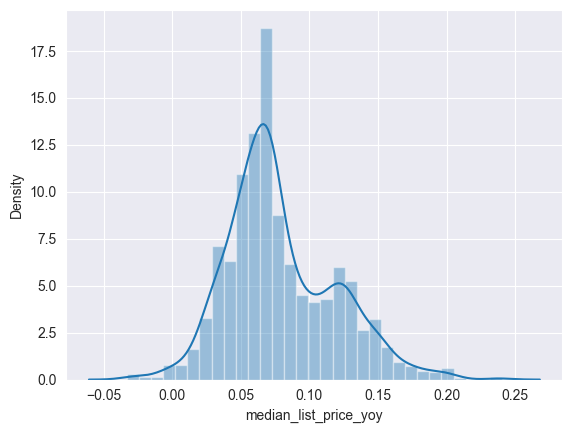

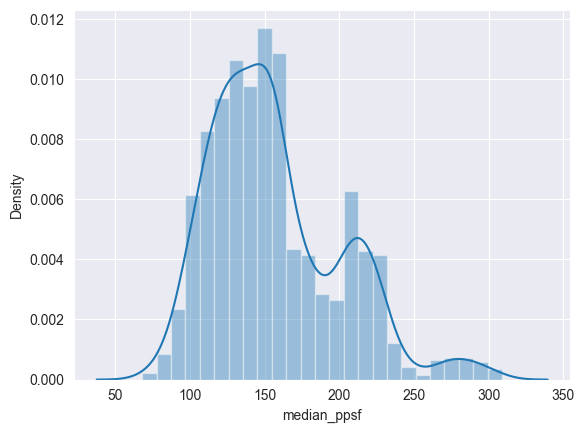

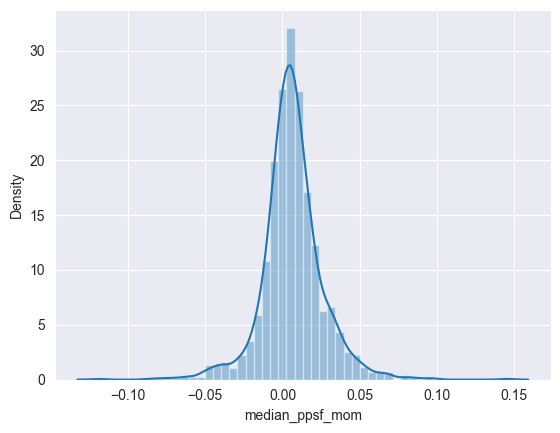

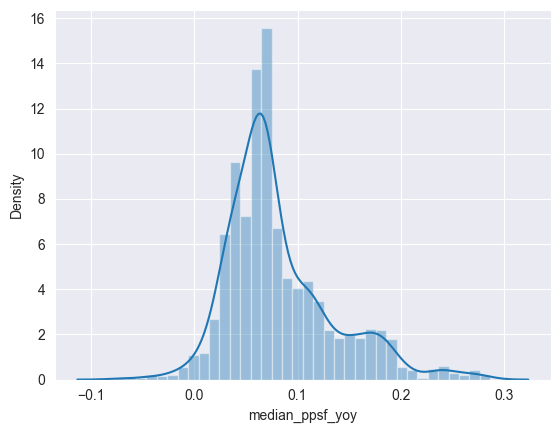

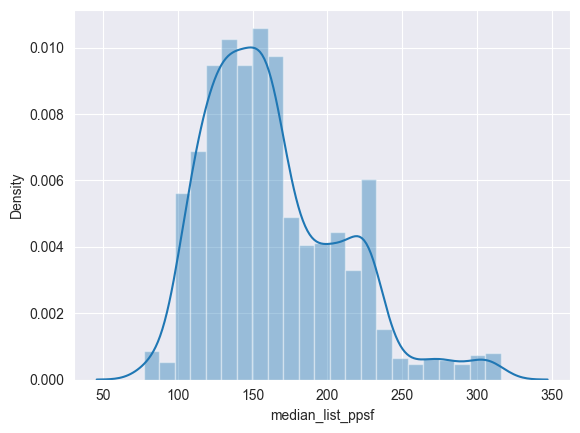

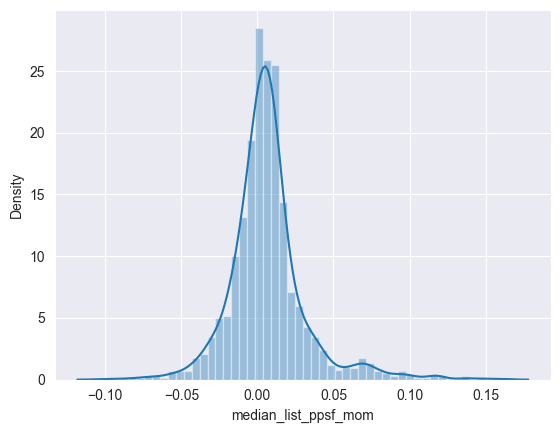

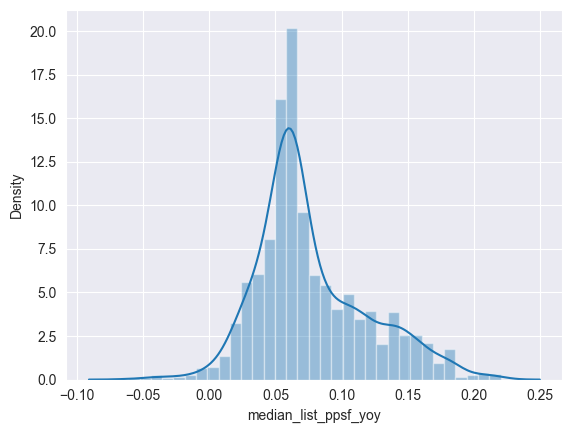

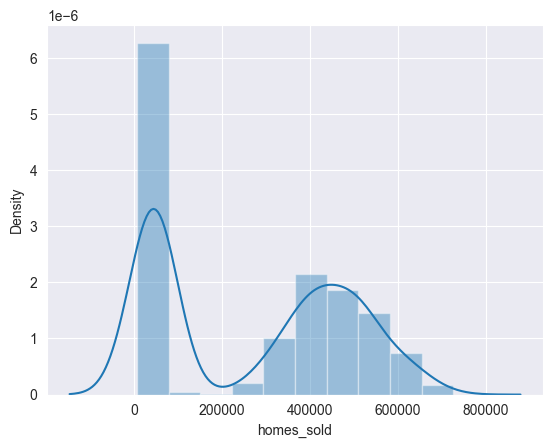

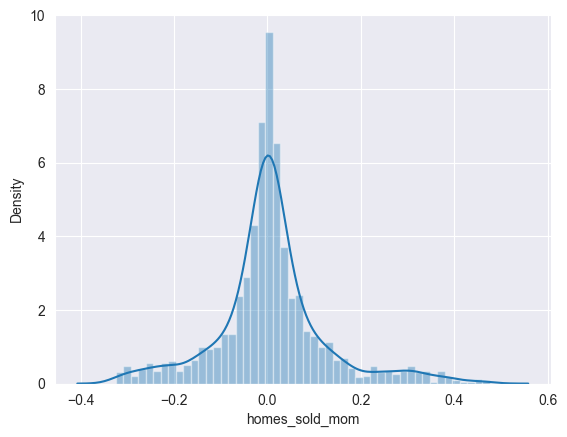

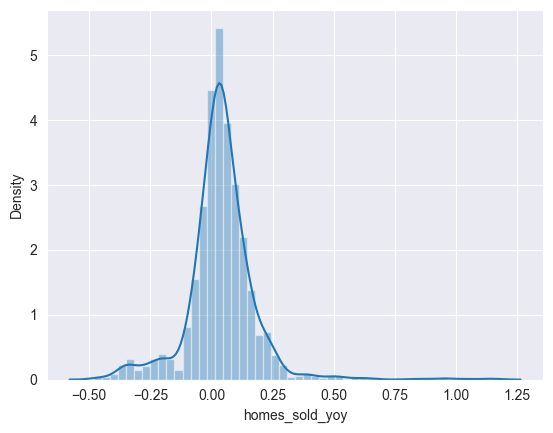

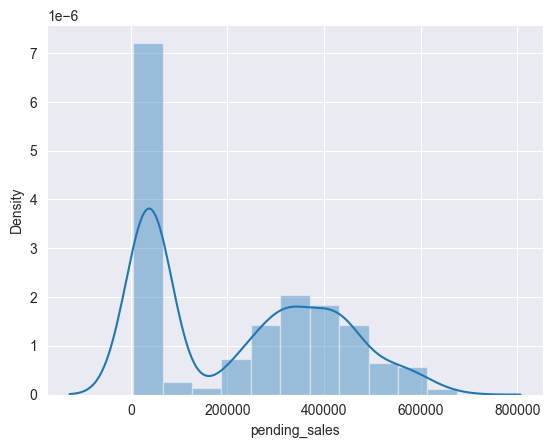

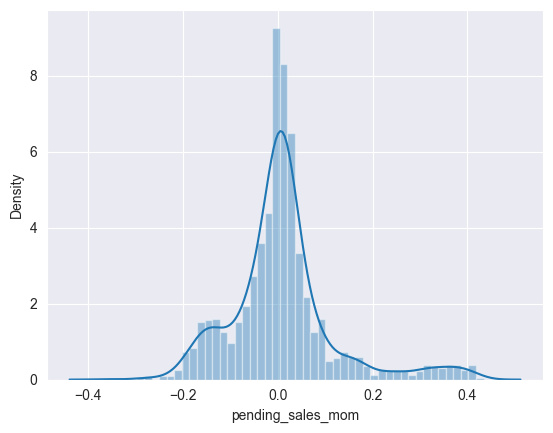

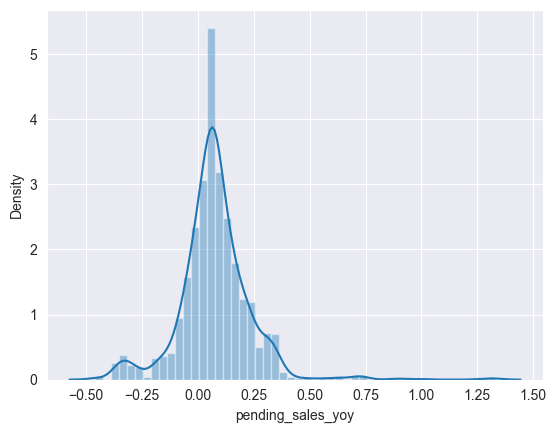

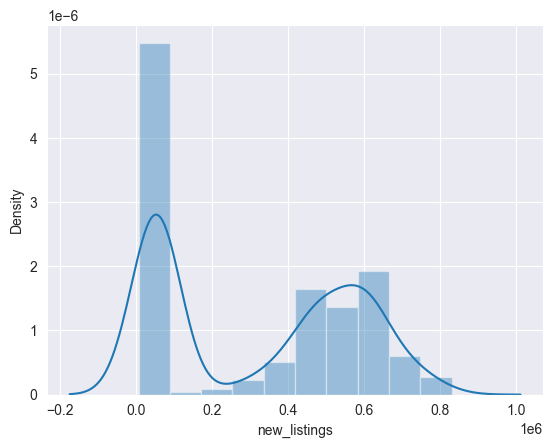

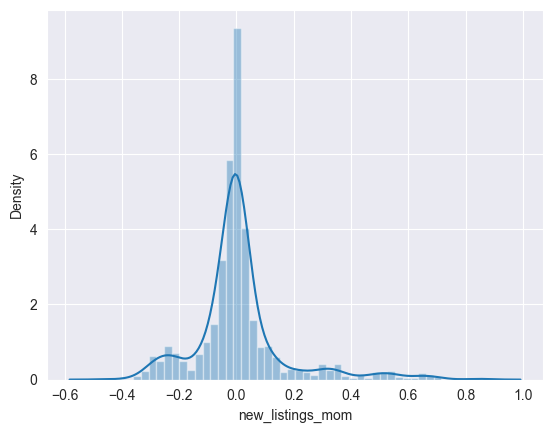

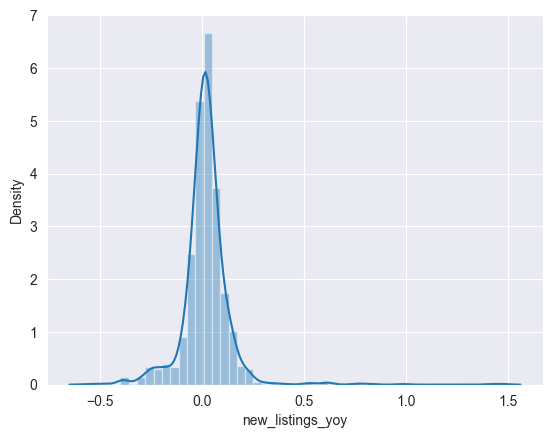

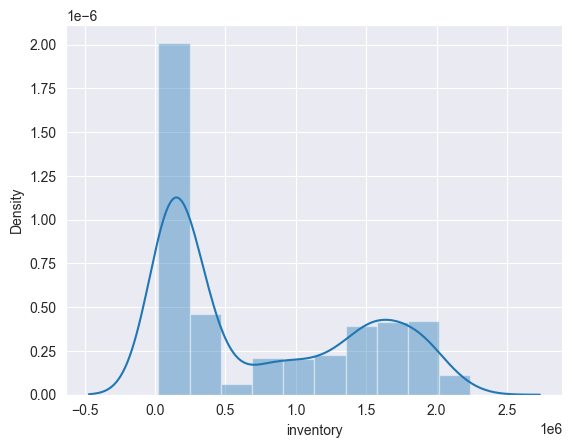

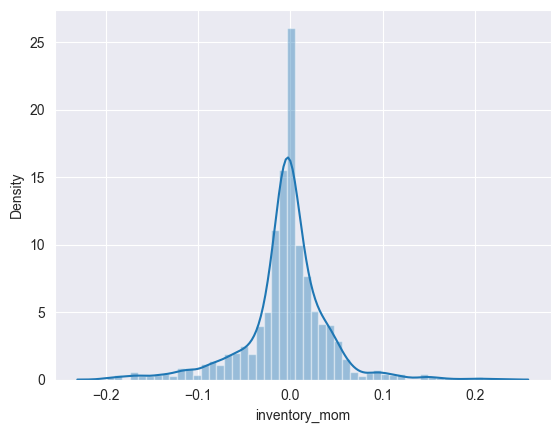

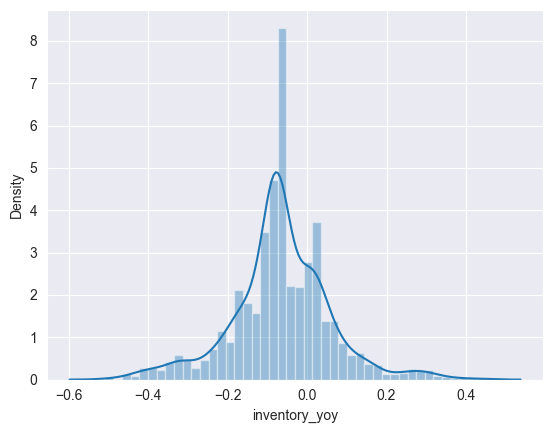

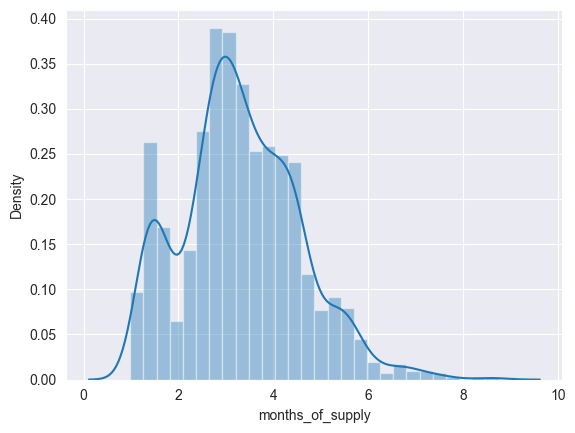

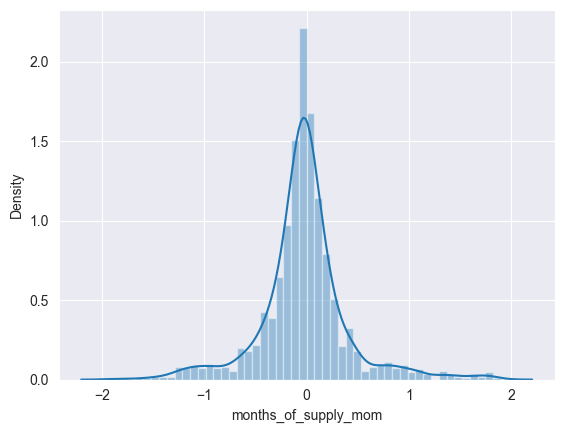

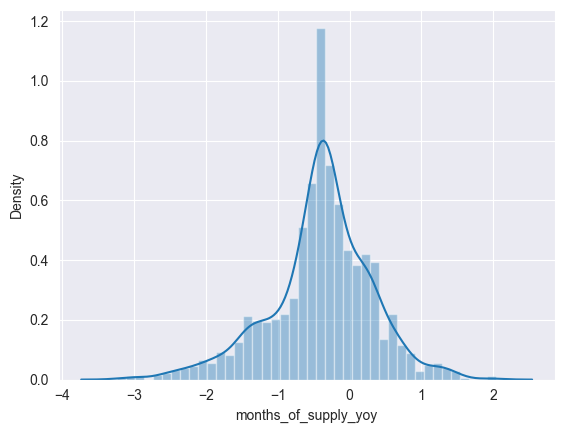

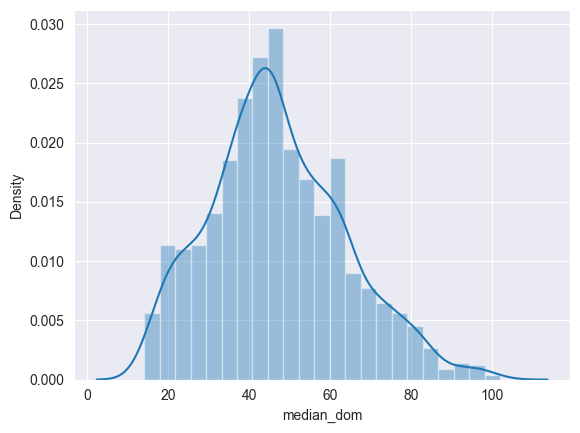

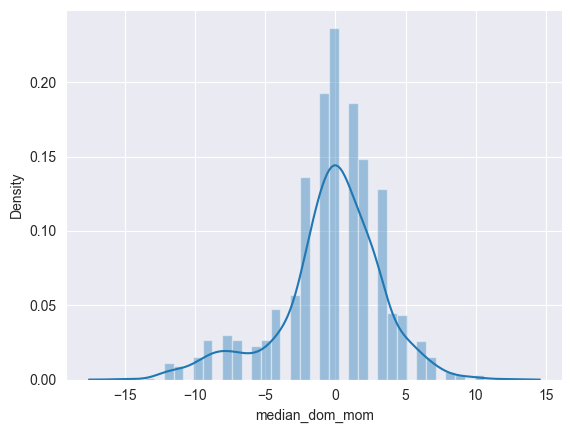

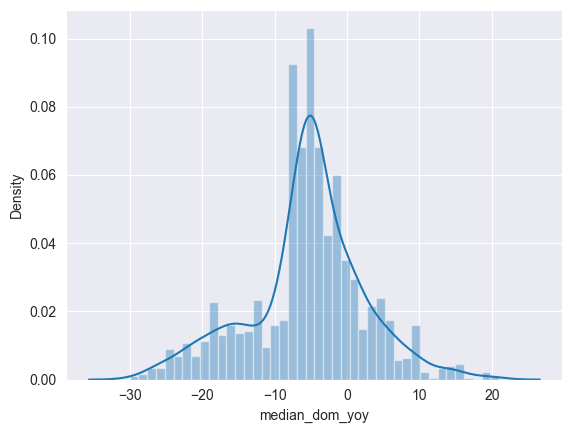

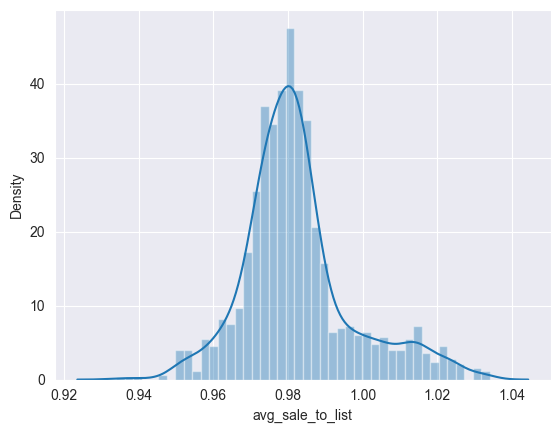

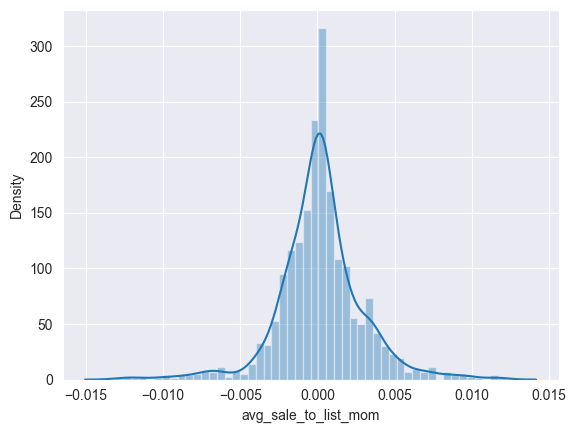

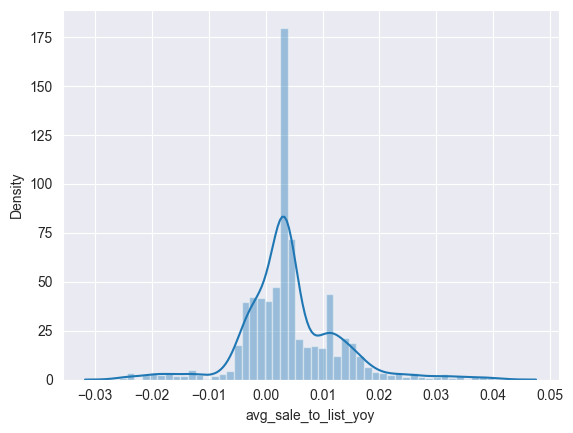

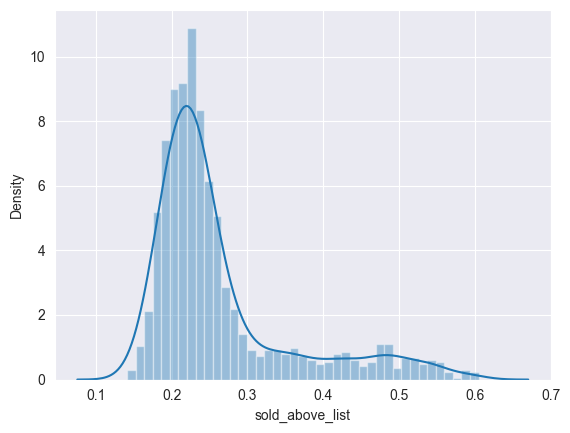

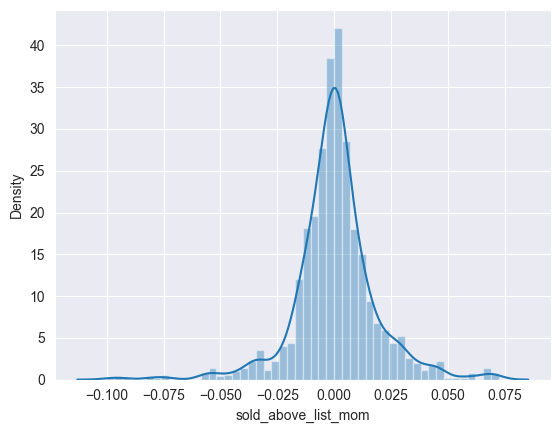

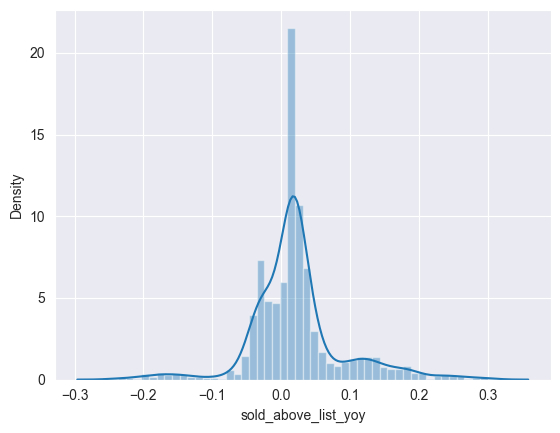

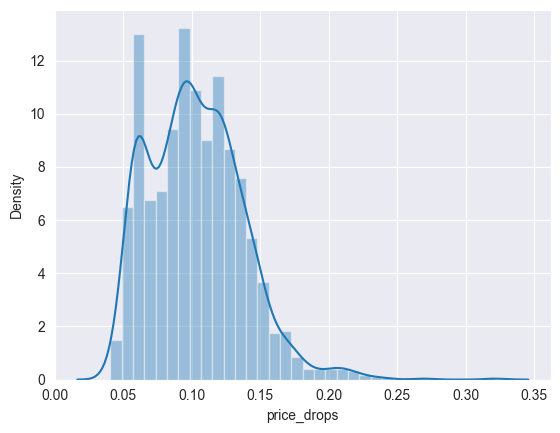

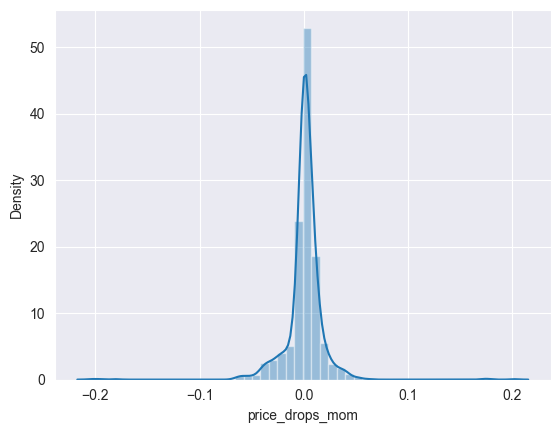

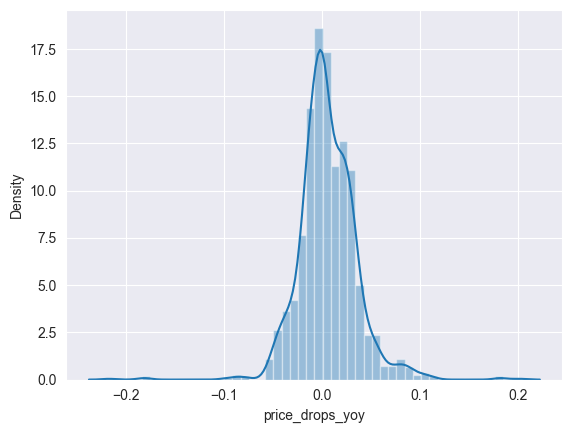

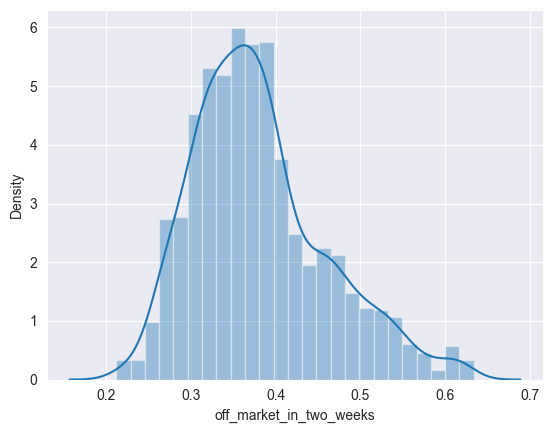

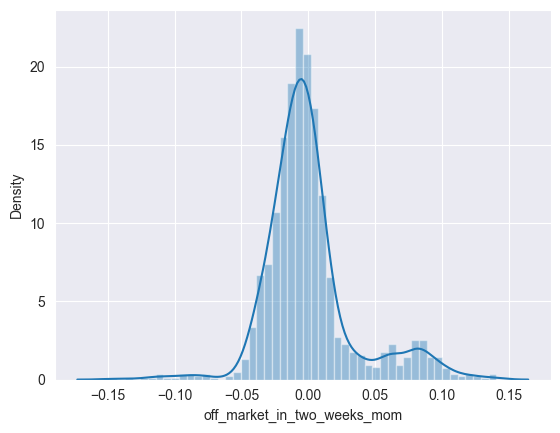

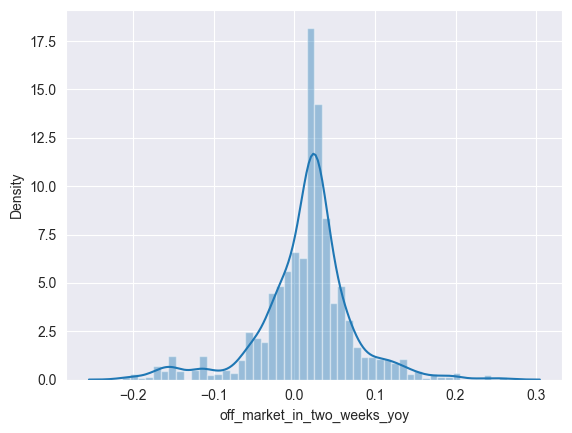

In [42]:
number_of_features = df.shape[1]
number_of_classes = len(np.unique(y))

colors=['r','b','g','aquamarine','black','yellow','purple']

feature_names=df.columns

features = df.columns

fig = plt.figure(figsize=(10, 10))

for feat in features: #For each feature, we have a new subplot
    plt.figure()
    sns.distplot(df[feat],label=feat) #Once we have a specific feature, we draw the histogram of the feature's data (X[:,i] means we get the i'th column of X)

plt.show()


Heatmaps are a pretty useful tool for visualizing the positive and negative correlations between the data we are using as well as the strength of these relationships. Its important to note that outliers and missing data can potentially heavily skew the heatmap which is why i removed the missing values. The outliers however are still present so that should be taken into consideration when looking at the correlations presented on this heatmap.


<AxesSubplot: >

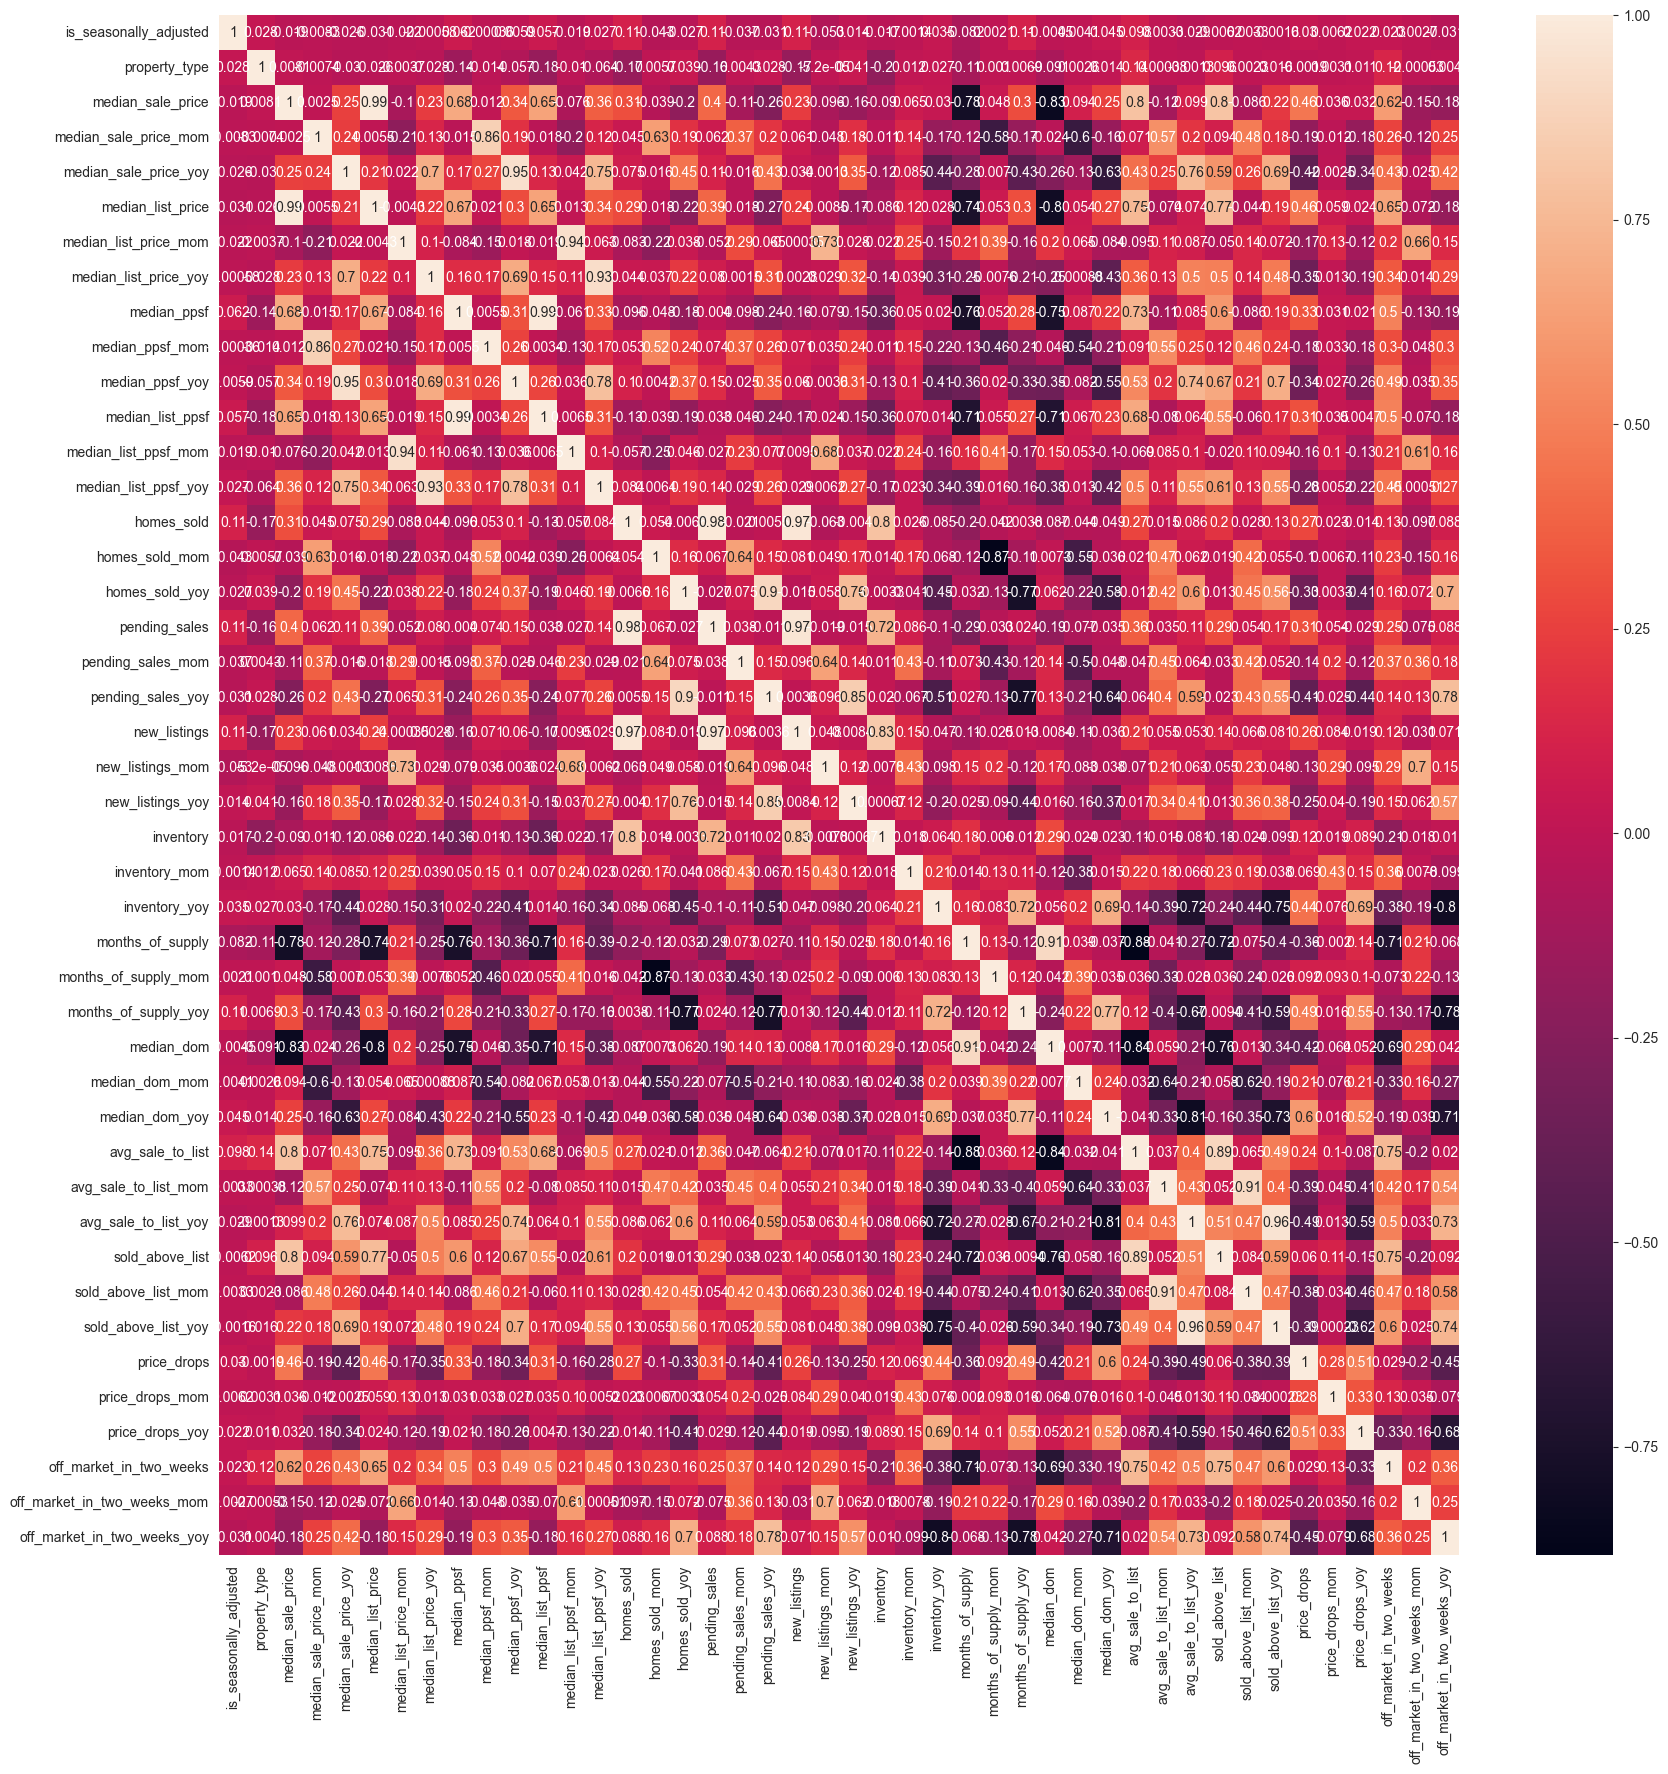

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
# show the plot

# PCA
PCA (Principal Component Analysis) is a dimensionality reduction technique that can be used to reduce the number of features in a dataset while retaining the most important information. We can determine to how many components we want to reduce the features by several methods. They include plotting the eigenvalues of each component, using Cross-validation to see how many components give the best results for our prediction models, or the one i will be using, calculating the explained variance ratio for each component and plotting it. The goal is to retain only the components that explain a significant portion of the variance, and ignore the rest.

In [44]:
pca = PCA()
data = pca.fit(X.values)
#df_reduced = pd.DataFrame(data=data)
#df_reduced

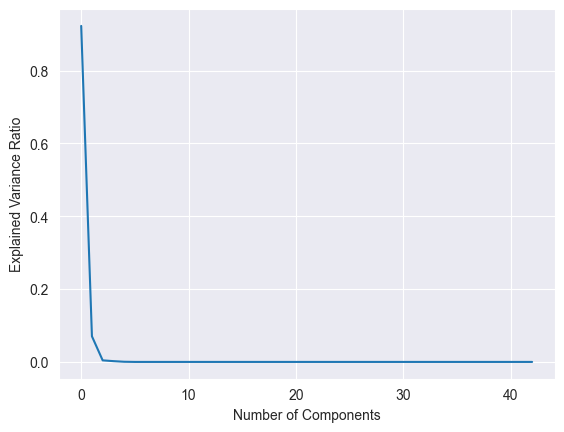

In [45]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [46]:
n_components = np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)[0][0]+1

# Re-fit PCA with retained components
pca = PCA(n_components)
X_reduced = pca.fit_transform(X)

In [47]:
X_reduced

array([[-829185.08173598, -120101.37422925],
       [-827998.88135821, -118843.40387754],
       [-739757.83550364,  -83691.56650901],
       ...,
       [ 797525.25967022,  105326.58611587],
       [1367280.72243797, -426905.41737073],
       [ 880301.49456275,   54631.83021193]])

By regular standards i.e. using 95% explained variance as a cutoff,  we only really need two columns because all others are essentially linear combinations of the first two  and do not add any significant information, however in order to have material to work with i will keep this data sicne the point is to display the methods for clustering, classifying and such...

# Outliers
Outliers are values in a dataset that are significantly different from other values in the same dataset. These outliers can have a significant impact on statistical analysis and modeling, as they can distort distributions and relationships between variables. One way to visualize the outliers is using boxplots for each value.


Here i will do the outlier clearnup by hand using the quartiles and the interquartile range to determine what data should be flagged as an outlier and removed. This is done to get more consistent results and prevent making biased models in the future because of the outliers. But first we visualise the outliers in each category.


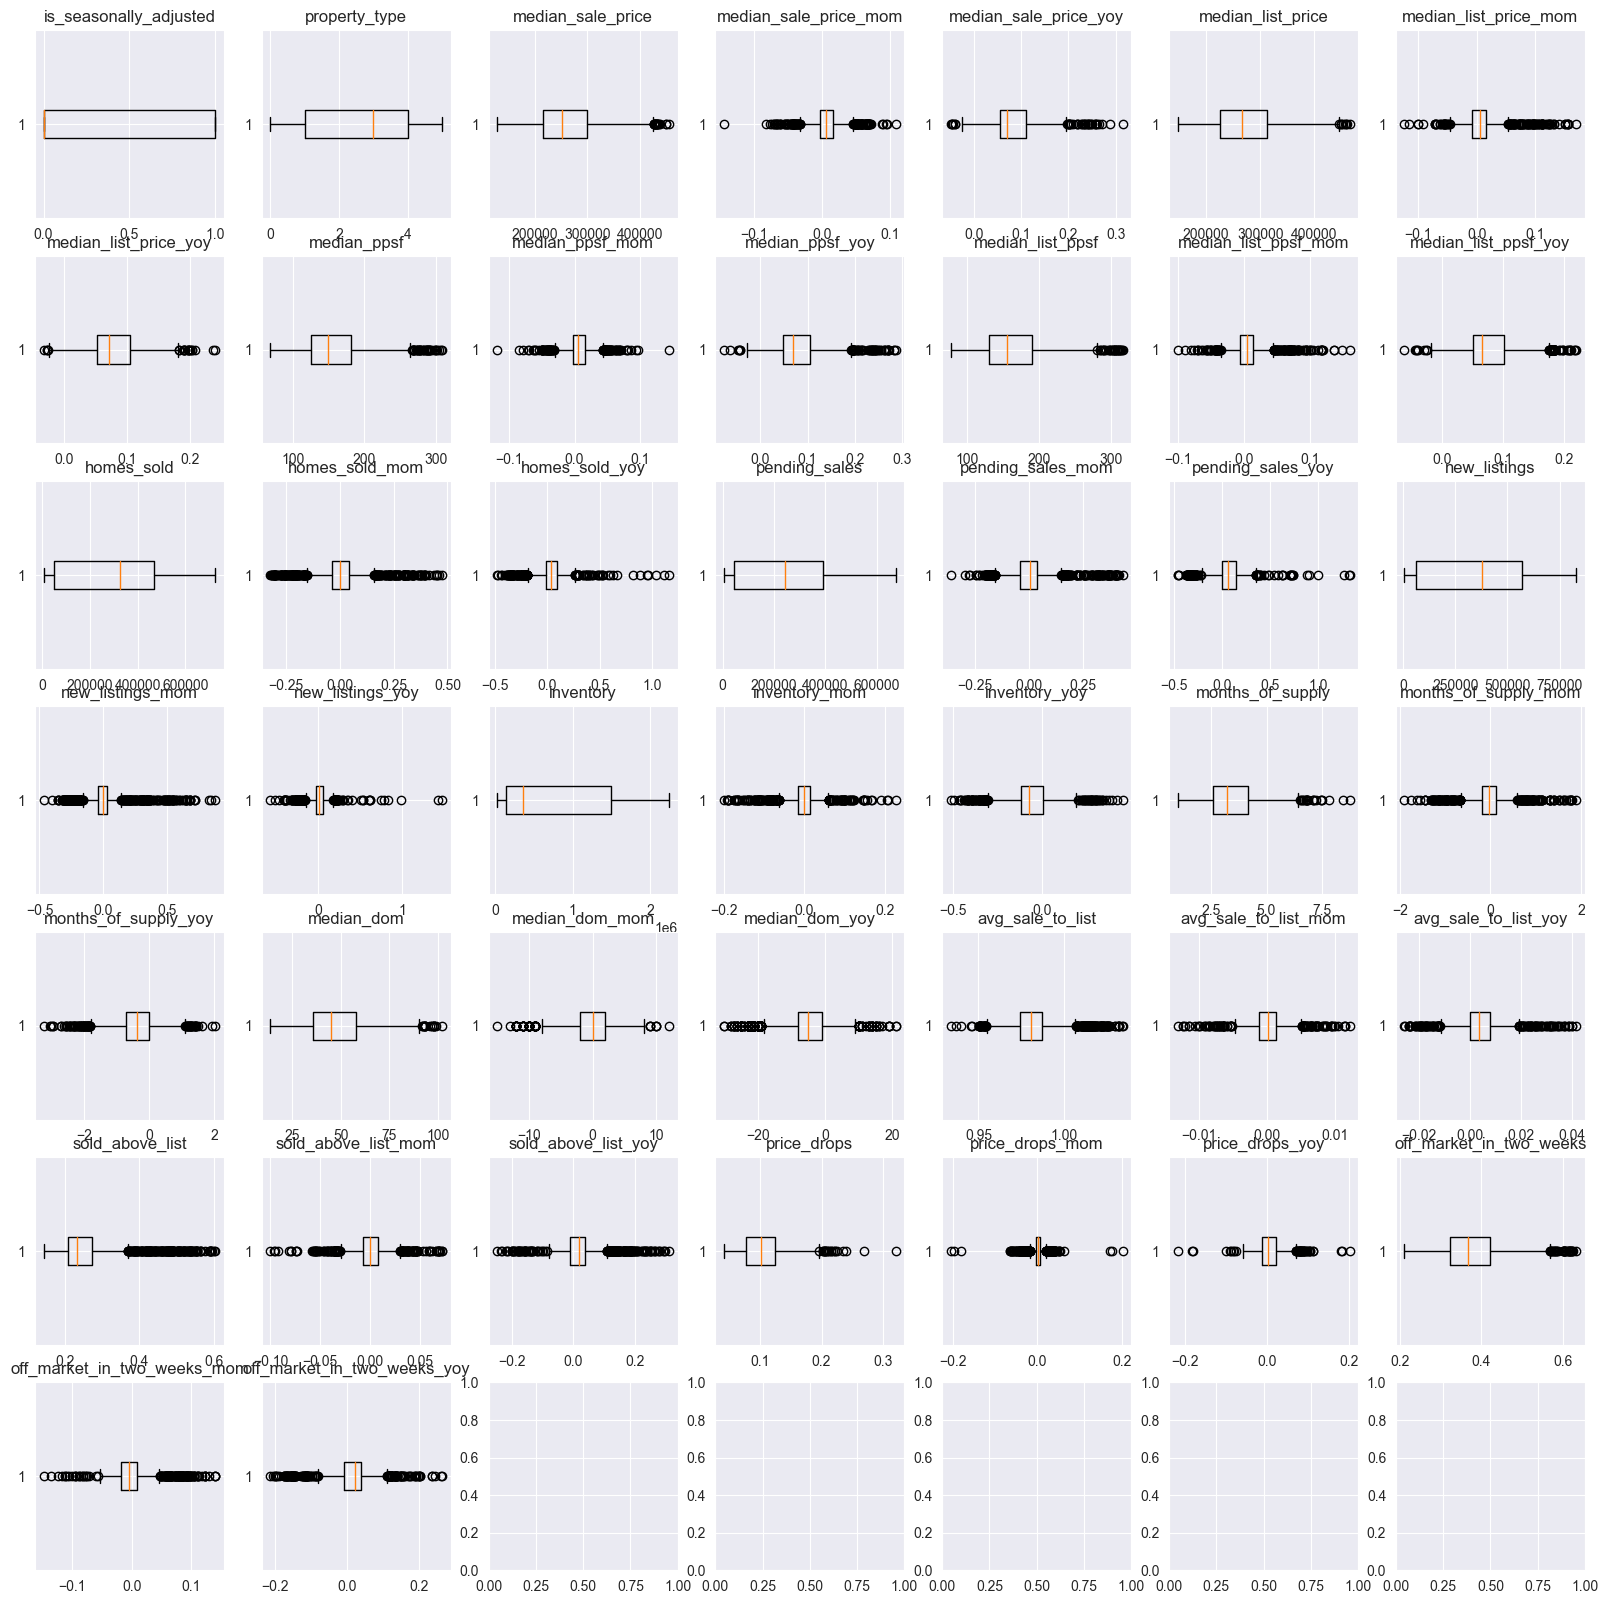

In [48]:
fig, axs = plt.subplots(7, 7, figsize=(20, 20))
axs = axs.ravel()
for i, column in enumerate(df.columns):
    axs[i].boxplot(df[column], vert=False)
    axs[i].set_title(column)
plt.show()

This is the general method for removing outliers, in which we remove the entire row that has an outlier however this only leaves us with a third of the initial dataset but it will make our models perform a lot better. The tradeoff is that the models will then perform worse when they face data with outliers which is apparently common (feels dumb to say that outliers are common but they somehow are in this dataset since theres so many features)
The models from what i checked worked pretty well and got around 90% accuracy with and without the outliers but since it does have better acc without them i will be removing them for the rest of this project.

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5 * IQR
# here i replace the outliers with the median
df = df[~((df < (Q1 - outlier_threshold)) | (df > (Q3 + outlier_threshold))).any(axis=1)]
df

,is_seasonally_adjusted,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,...,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
2,0,5,242999.000000,0.006764,0.050383,257980.000000,0.045297,0.065170,152.000000,0.008776,...,0.002909,0.252099,-0.015016,0.016016,0.097603,-0.000295,-0.001058,0.402473,0.005173,0.041389
4,0,4,292611.000000,0.019186,0.053400,299829.000000,-0.024614,0.062953,156.000000,0.012703,...,0.001875,0.296685,0.001505,0.012185,0.149537,0.010169,0.019675,0.415500,-0.042659,0.018937
10,0,5,265772.000000,0.026362,0.032726,278252.000000,-0.002168,0.026636,162.000000,0.017325,...,-0.004789,0.263703,0.022822,-0.040647,0.129573,0.010610,0.020727,0.472397,-0.010374,-0.052536
12,0,5,217762.000000,0.007742,0.063319,223343.000000,-0.019321,0.063156,138.000000,-0.002345,...,0.003808,0.210108,-0.007098,0.017439,0.121259,0.008380,0.011765,0.322945,-0.008528,0.020264
15,0,1,223563.000000,0.027319,0.081258,237813.000000,0.007927,0.093693,190.000000,0.038157,...,0.002821,0.221668,-0.000857,0.012917,0.108885,0.005634,0.000626,0.366949,-0.027602,0.030410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1,4,214932.165303,0.001652,0.080756,229188.954490,0.019623,0.077985,116.842396,0.003053,...,-0.002016,0.197193,-0.003855,-0.026827,0.087611,0.012898,0.032147,0.306234,-0.013499,-0.013621
1446,1,1,192870.069618,0.000418,0.059784,202005.057436,-0.002825,0.071780,164.827970,-0.007616,...,-0.003959,0.162704,0.004202,-0.038707,0.088645,-0.005460,0.020017,0.304044,-0.003728,-0.011730
1449,1,4,278361.746342,0.011058,0.074147,291358.869134,0.002413,0.078590,150.347107,0.007213,...,0.003417,0.254003,0.003122,0.022025,0.126219,0.004020,0.005939,0.404988,0.001157,0.016444
1450,1,0,177432.705874,0.012467,0.070698,187931.548451,-0.008908,0.070539,97.221372,0.008180,...,0.003214,0.179483,-0.005890,0.017451,0.059487,-0.001724,0.002987,0.273479,0.001005,0.021020
